In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
path="/content/drive/My Drive/india-news-headlines.csv"
news=pd.read_csv(path)

In [23]:
news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [24]:
news['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
ballot-talk                     7
delhi-ncr                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [25]:
city_data = news[news['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_split = pd.DataFrame(columns=['city_name'])

In [26]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]
city_data = pd.concat([city_data,city_split],axis=1)

In [27]:
city_data.drop(columns=['headline_category'],axis=1, inplace=True)
city_data.reset_index(inplace=True)

In [28]:
city_data.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [29]:
np.unique(city_data.city_name,return_counts=True)

(array(['agartala', 'agra', 'ahmedabad', 'ajmer', 'allahabad', 'amaravati',
        'amritsar', 'aurangabad', 'bareilly', 'bengaluru', 'bhopal',
        'bhubaneswar', 'chandigarh', 'chennai', 'coimbatore', 'cuttack',
        'dehradun', 'delhi', 'erode', 'faridabad', 'gaya', 'ghaziabad',
        'goa', 'gurgaon', 'guwahati', 'hubballi', 'hyderabad', 'imphal',
        'indore', 'itanagar', 'jaipur', 'jammu', 'jamshedpur', 'jind',
        'jodhpur', 'kanpur', 'kochi', 'kohima', 'kolhapur', 'kolkata',
        'kozhikode', 'lucknow', 'ludhiana', 'madurai', 'mangaluru',
        'meerut', 'mumbai', 'mysuru', 'nagpur', 'nashik', 'navimumbai',
        'noida', 'patna', 'puducherry', 'pune', 'raipur', 'rajahmundry',
        'rajkot', 'ranchi', 'salem', 'shillong', 'shimla', 'srinagar',
        'surat', 'thane', 'thiruvananthapuram', 'trichy', 'udaipur',
        'vadodara', 'varanasi', 'vijayawada', 'visakhapatnam'],
       dtype=object),
 array([  1177,   4043,  85813,   1319,  18767,   1676, 

In [30]:
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})
city_headline.rename(columns={'headline_text':'No._headline_text'},inplace=True)
city_headline = city_headline.sort_values(by='No._headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


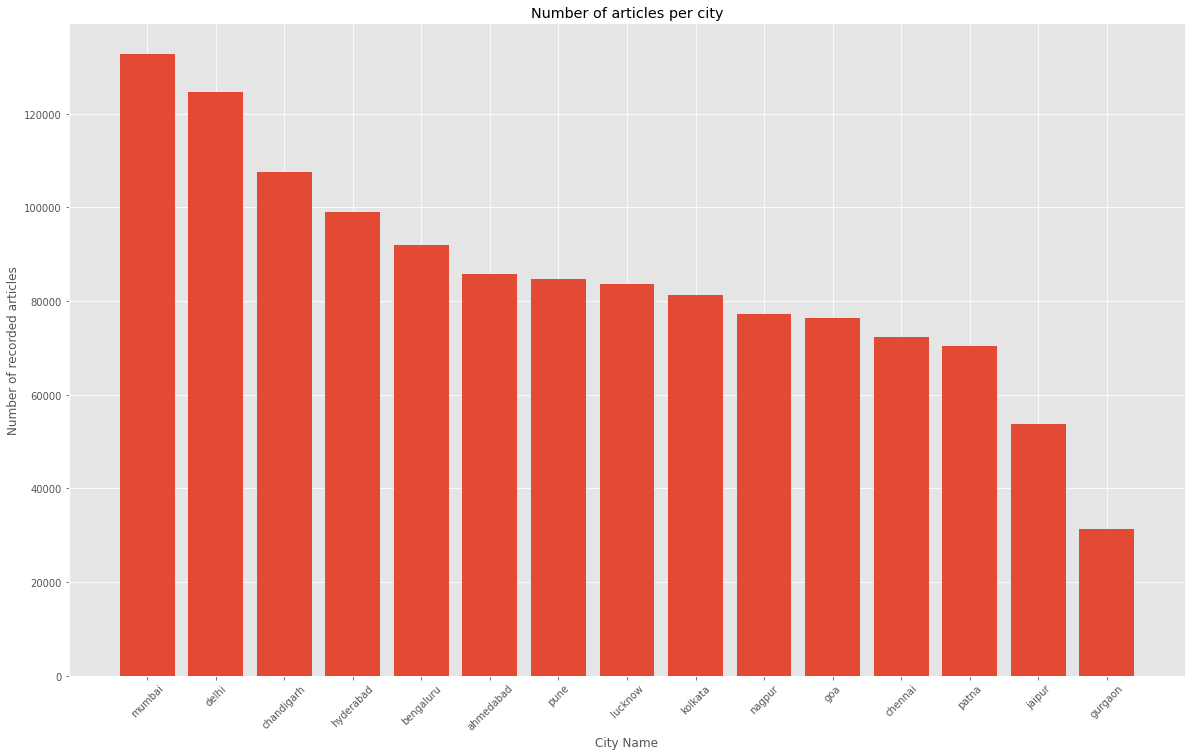

In [31]:
plt.figure(figsize=(20,12))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['No._headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name')
plt.ylabel('Number of recorded articles')
plt.title('Number of articles per city')
plt.show()

In [32]:
city_data['publish_date'] = pd.to_datetime(city_data['publish_date'])
city_data.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


In [33]:
city_data['Year'] = city_data['publish_date'].apply(lambda x: (x.microsecond)//10)

In [34]:
city_data.drop(columns=['publish_date','index'],axis=1,inplace=True)

In [35]:
city_data.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


In [36]:
city_data_2 = city_data.copy()
city_data_2['No_headline_text'] = 1


In [37]:
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)


In [38]:
city_data_2.head()

,city_name,Year,No_headline_text
0,bengaluru,2001,1
1,patna,2001,1
2,bengaluru,2001,1
3,delhi,2001,1
4,patna,2001,1


In [39]:
top_15_headline_city.head(10)

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


In [40]:
city_del = city_data_2[city_data_2.city_name == 'mumbai']
city_mum = city_data_2[city_data_2.city_name == 'delhi']
city_chan = city_data_2[city_data_2.city_name == 'chandigarh']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_bang = city_data_2[city_data_2.city_name == 'bengaluru']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_lucknow=city_data_2[city_data_2.city_name=='lucknow']
city_kolkata=city_data_2[city_data_2.city_name=='kolkata']
city_nagpur=city_data_2[city_data_2.city_name =='nagpur']

In [41]:
famous_cities = [city_del, city_mum, city_chan, city_hyd, city_bang, city_ahme, city_pune,city_lucknow,city_kolkata,city_nagpur]
data_famous_cities = pd.concat(famous_cities)
data_famous_cities.reset_index(inplace=True)
print(data_famous_cities.shape)
data_famous_cities.head()

(968264, 4)


,index,city_name,Year,No_headline_text
0,37,mumbai,2001,1
1,41,mumbai,2001,1
2,51,mumbai,2001,1
3,55,mumbai,2001,1
4,57,mumbai,2001,1


In [33]:
city_year_count = pd.Series(city_data_2.groupby(['Year'])['No_headline_text'].count())
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['No_headline_text'].unstack()


In [34]:
city_count.head()

city_name,ahmedabad,bengaluru,chandigarh,delhi,hyderabad,kolkata,lucknow,mumbai,nagpur,pune
Year,,,,,,,,,,
2001,3131.0,5739.0,2283.0,2462.0,4493.0,2341.0,3655.0,2465.0,NaN,1534.0
2002,5251.0,7170.0,5047.0,4845.0,6547.0,4303.0,6115.0,4366.0,NaN,3357.0
2003,4446.0,4382.0,5476.0,4850.0,5475.0,4492.0,5331.0,3762.0,NaN,3790.0
2004,2657.0,2759.0,3714.0,5926.0,2523.0,2731.0,3005.0,2822.0,NaN,2904.0
2005,1736.0,1714.0,1106.0,2880.0,1539.0,596.0,1535.0,1556.0,NaN,974.0


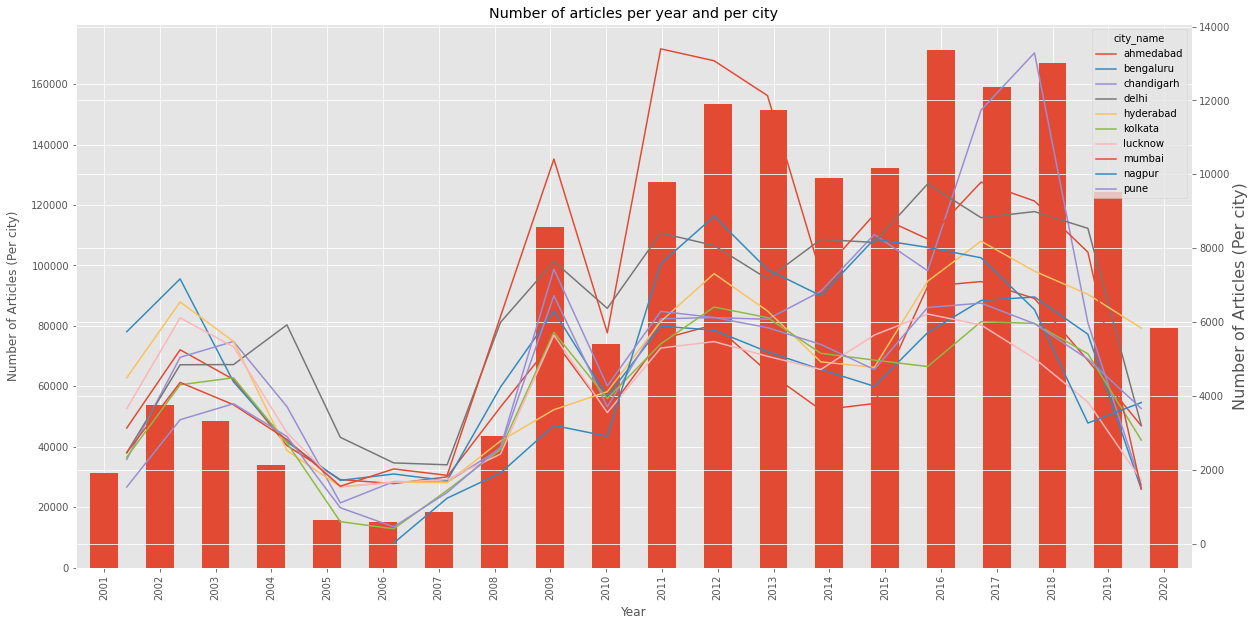

<Figure size 1440x720 with 0 Axes>

In [35]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

In [42]:
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [43]:
new_data = news.copy()

In [44]:
new_data['category']=new_data['headline_category'].str.split('.').map(lambda x : x[0])
new_data.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


In [51]:
top_categories = new_data.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)

In [52]:
top_10_cat = top_categories.drop(['unknown', 'tv', 'top-stories', 'city', 'citizen', 'edit-page','top-headlines','world']).head(10)
top_10_cat

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [53]:
top_10_cat.reset_index(inplace=True)

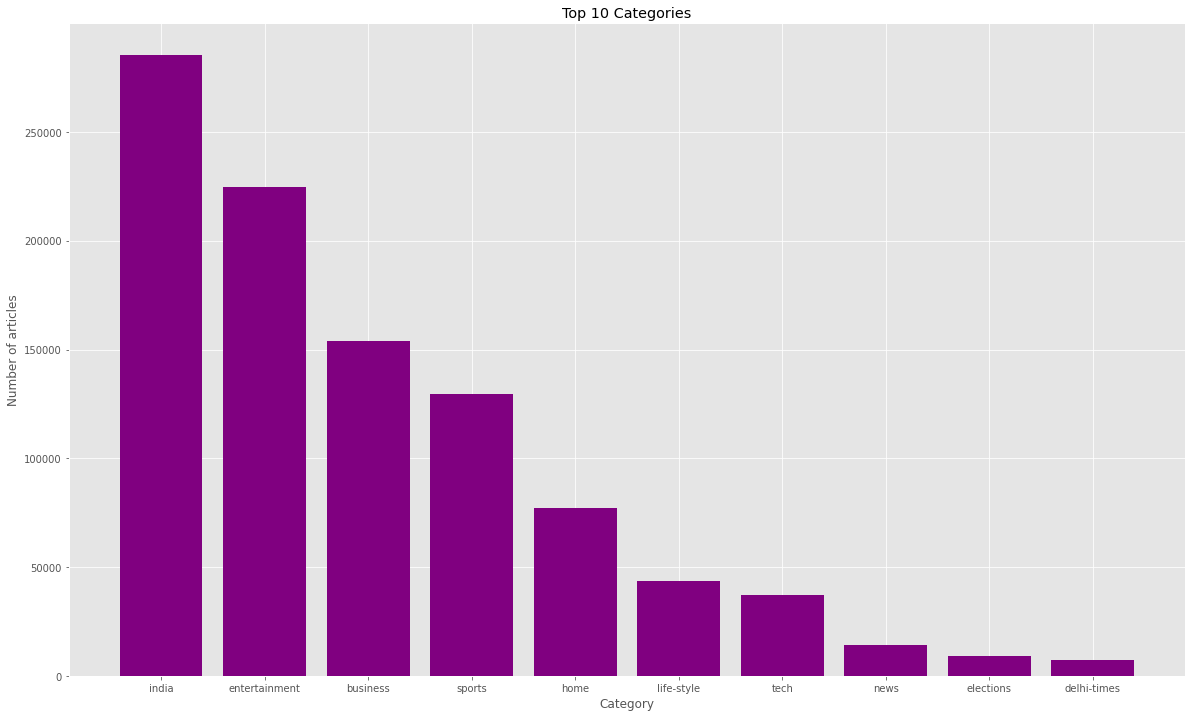

In [54]:
plt.figure(figsize=(20,12))
plt.bar(top_10_cat.category, height=top_10_cat.headline_text,color = 'purple')
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

In [55]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'


In [58]:
news['Result'] = np.array([getAnalysis_polarity(headline) for headline in news['headline_text']])
news.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


In [59]:
final_result = news.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,398194
neutral,2301599
positive,597379


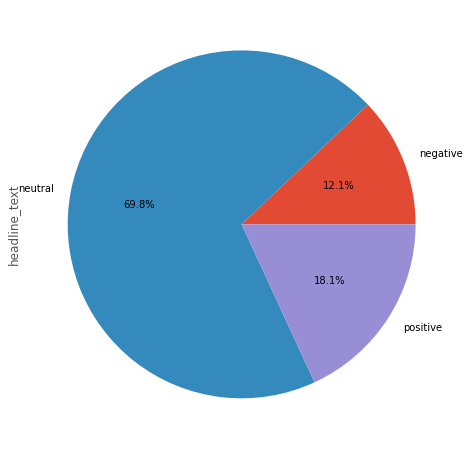

In [60]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.show()


In [61]:
negative = (final_result.loc['negative'] / len(news))*100
neutral = (final_result.loc['neutral'] / len(news))*100
positive = (final_result.loc['positive'] / len(news))*100

In [62]:
print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))


Positive Headlines:  headline_text    18.11792
Name: positive, dtype: float64


Negative Headlines:  headline_text    12.076834
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    69.805245
Name: neutral, dtype: float64


In [63]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Stocks.csv to Stocks (1).csv
User uploaded file "Stocks.csv" with length 29580549 bytes


In [66]:
df = pd.read_csv("Stocks.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [67]:
df.isna().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [68]:
df['open'].value_counts()

70.0000     218
52.0000     197
75.0000     188
47.0000     181
50.0000     179
           ... 
51.5588       1
538.4300      1
44.6178       1
41.1534       1
94.3450       1
Name: open, Length: 49715, dtype: int64

In [69]:
df['open'].fillna(value=70.0000,inplace=True)

In [70]:
df['high'].value_counts()

55.0000     138
60.0000     135
50.0000     134
72.0000     132
42.0000     132
           ... 
126.5605      1
253.9800      1
143.8050      1
109.3799      1
54.4001       1
Name: high, Length: 81499, dtype: int64

In [71]:
df['high'].fillna(value=55.0000,inplace=True)

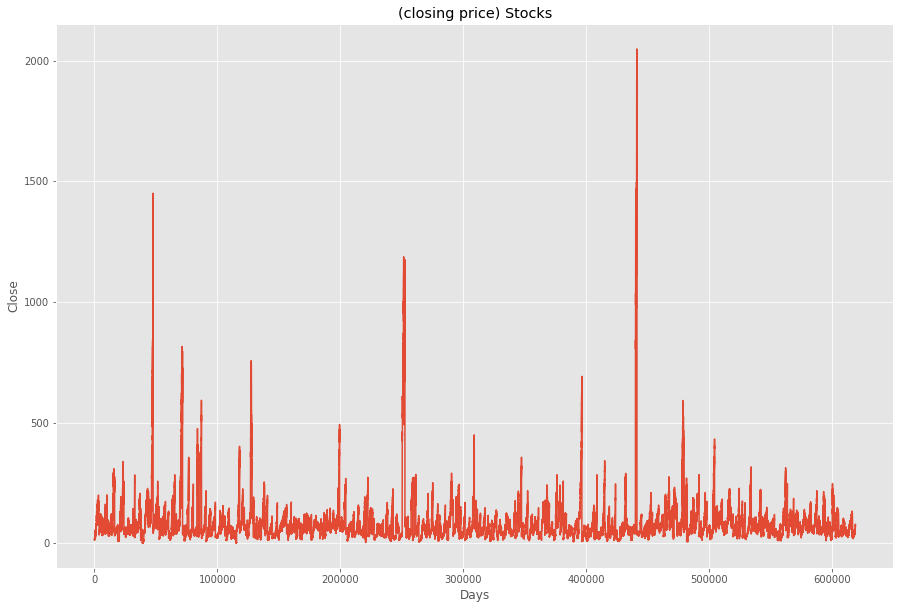

In [72]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['close'])
plt.xlabel('Days')
plt.ylabel('Close')
plt.title('(closing price) Stocks')
plt.show()

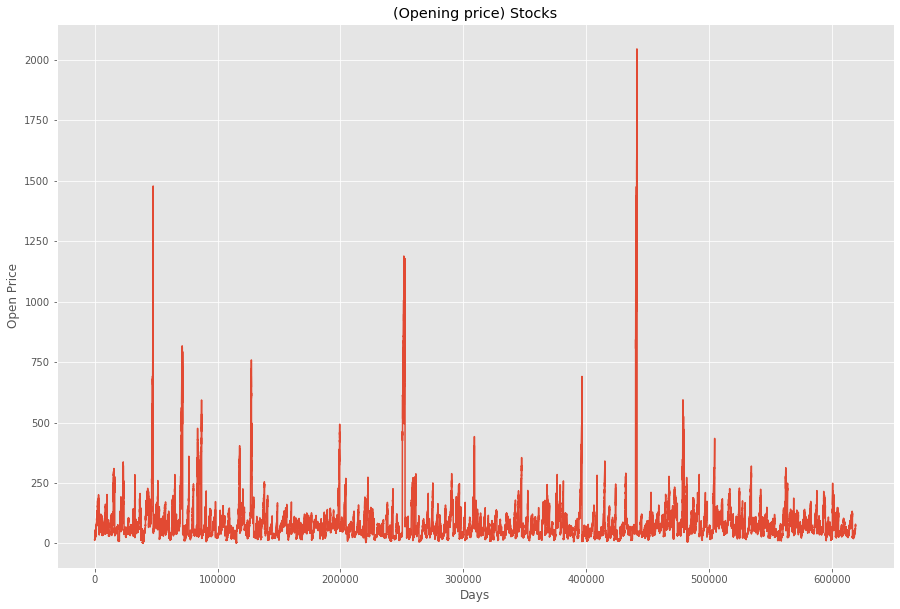

In [73]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('(Opening price) Stocks')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


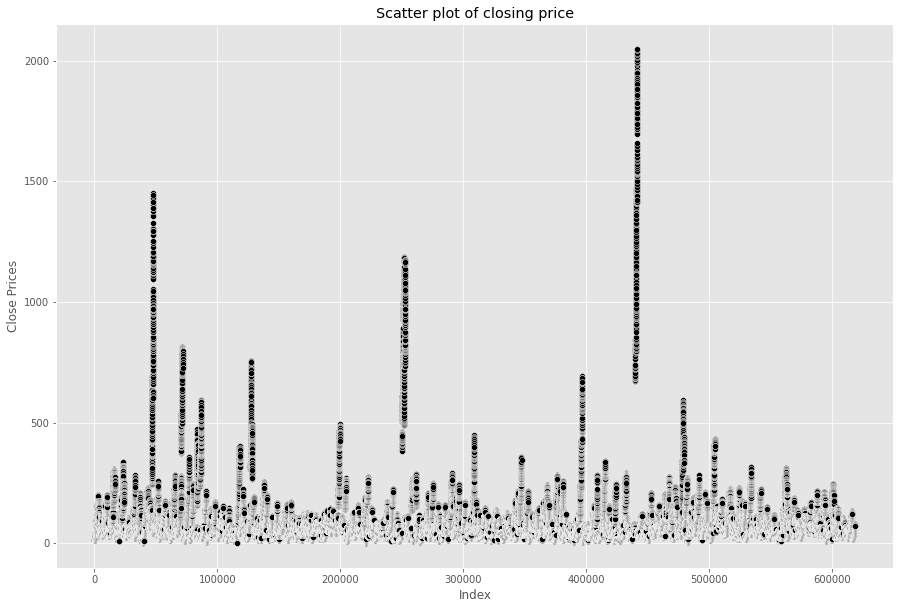

In [74]:
plt.figure(figsize=(15,10))
plt.grid(True)
sns.scatterplot(df.index,df['close'],color='black')
plt.xlabel('Index')
plt.ylabel('Close Prices')
plt.title('Scatter plot of closing price')
plt.show()


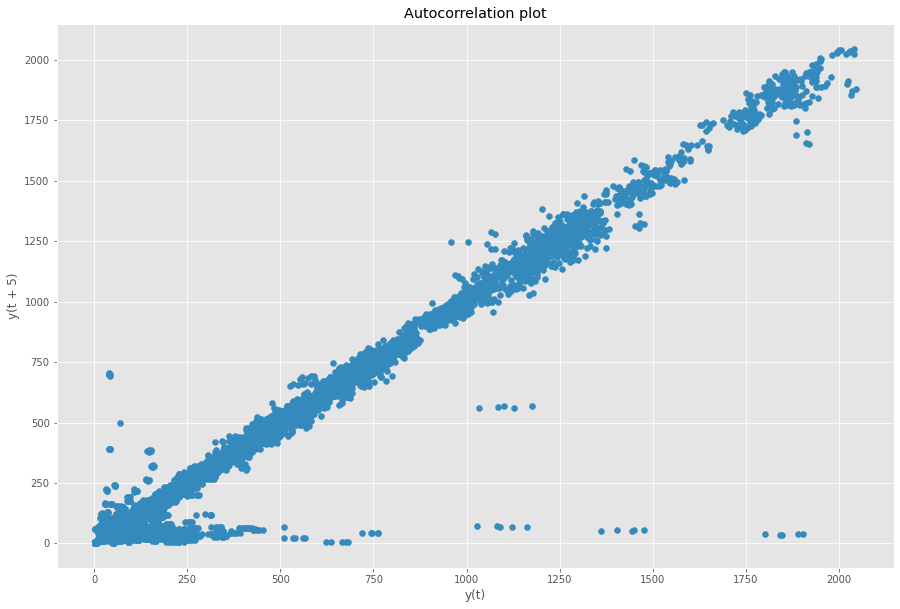

In [75]:
plt.figure(figsize=(15,10))
plt.grid(True)
lag_plot(df['open'], lag=5)
plt.title('Autocorrelation plot')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

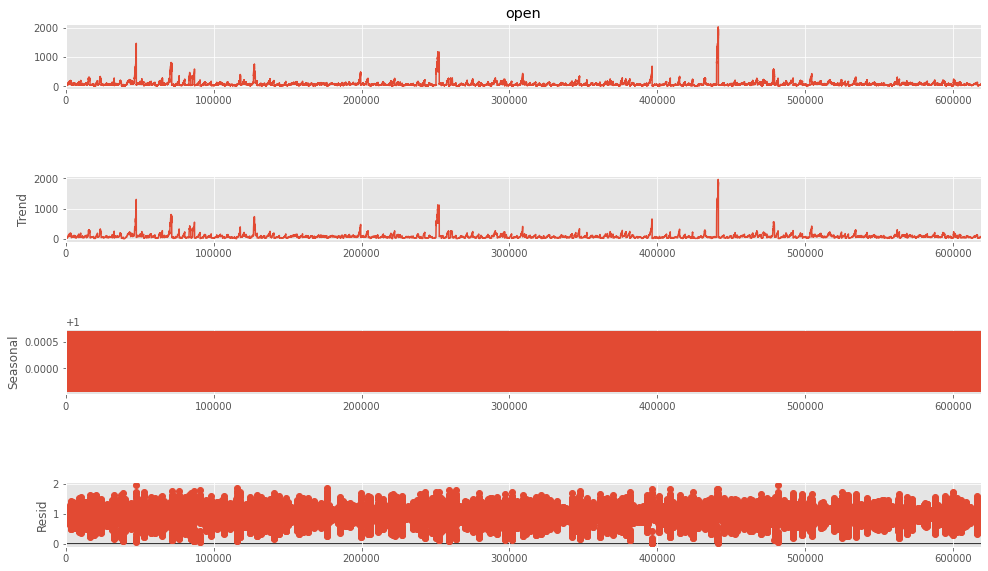

In [76]:
sea_dec = seasonal_decompose(df['open'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = sea_dec.plot()  
fig.set_size_inches(16, 9)
plt.show()

In [77]:
train = df[df['date'] > '2013-04-30']
test = df[df['date'] < '2013-04-30']

In [78]:
train.shape

(592388, 7)

In [79]:
test.shape

(26176, 7)

In [80]:
test_data = test['open']
train_data = train['open']

In [92]:
df["Date"]=df['date']

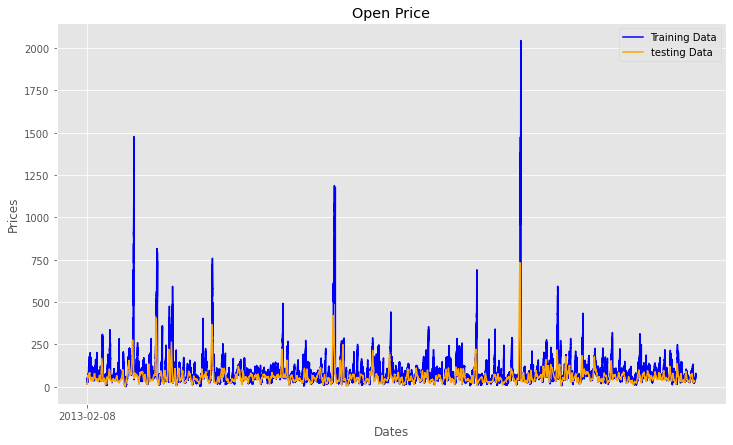

In [81]:
plt.figure(figsize=(12,7))
plt.title('Open Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'orange', label='testing Data')
plt.xticks(np.arange(0,185007, 310000), df['date'][0:185700:30000])
plt.legend()
plt.show()

In [82]:
train.head()

,date,open,high,low,close,volume,Name
56,2013-05-01,16.91,17.17,16.60,16.60,4943600,AAL
57,2013-05-02,16.72,16.98,16.60,16.94,4888900,AAL
58,2013-05-03,17.02,17.19,16.89,17.02,6451900,AAL
59,2013-05-06,17.05,17.11,16.91,17.00,3930700,AAL
60,2013-05-07,17.15,17.15,16.95,16.98,3157000,AAL


In [86]:
from google.colab import files
uploaded = files.upload()


Saving Combined_News_DJIA.csv to Combined_News_DJIA.csv


In [98]:
new=pd.concat([news,df],axis=1)

In [99]:
new.head()

,publish_date,headline_category,headline_text,Result,date,open,high,low,close,volume,Name,Date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL,2013-02-08
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL,2013-02-11
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL,2013-02-12
3,20010102,unknown,America's unwanted heading for India?,neutral,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL,2013-02-13
4,20010102,unknown,For bigwigs; it is destination Goa,neutral,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL,2013-02-14


In [87]:
new_Data=pd.read_csv('Combined_News_DJIA.csv')
new_Data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [89]:
unwanted_col = new_Data.iloc[:,2:27].columns
new_Data.drop(columns=unwanted_col, inplace=True)

In [133]:
hybrid_data = new_Data.merge(new, how='inner', on='Date', left_index = True)

In [134]:
hybrid_data.head()

,Date,Label,publish_date,headline_category,headline_text,Result,date,open,high,low,close,volume,Name
0,2013-02-08,1,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive,2013-02-08,15.0700,15.1200,14.6300,14.7500,8407500.0,AAL
1259,2013-02-08,1,20010204,unknown,Ode to an Asian Vaz,neutral,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416.0,AAPL
2518,2013-02-08,1,20010322,unknown,Bobby's new found happiness!,positive,2013-02-08,78.3400,79.7200,78.0100,78.9000,1298137.0,AAP
3777,2013-02-08,1,20010501,unknown,The Forgotten Scam,neutral,2013-02-08,36.3700,36.4200,35.8250,36.2500,13858795.0,ABBV
5036,2013-02-08,1,20010529,city.bengaluru,HC directs KGF to release salaries for March,neutral,2013-02-08,46.5200,46.8950,46.4600,46.8900,1232802.0,ABC


In [135]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [136]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])


In [137]:
hybrid_data.drop(['Date','date'],axis=1,inplace=True)


In [149]:
hybrid_data.drop(['headline_category'],axis=1,inplace=True)

In [150]:
hybrid_data.head()

,Label,publish_date,headline_text,Result,open,high,low,close,volume,Name,sentiment
0,1,20010101,win over cena satisfying but defeating underta...,positive,15.0700,15.1200,14.6300,14.7500,8407500.0,AAL,positive
1259,1,20010204,Ode to an Asian Vaz,neutral,67.7142,68.4014,66.8928,67.8542,158168416.0,AAPL,neutral
2518,1,20010322,Bobby's new found happiness!,positive,78.3400,79.7200,78.0100,78.9000,1298137.0,AAP,positive
3777,1,20010501,The Forgotten Scam,neutral,36.3700,36.4200,35.8250,36.2500,13858795.0,ABBV,neutral
5036,1,20010529,HC directs KGF to release salaries for March,neutral,46.5200,46.8950,46.4600,46.8900,1232802.0,ABC,neutral
